# Fourier Gaussiana

Transformada de fourier discreta, en este caso para una distribucion gaussiana

$X_k = \sum_{n=0}^{N-1} x_n \cdot e^{-i 2 \pi k n /N} $

referencias:

https://jakevdp.github.io/blog/2013/08/28/understanding-the-fft/

https://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html

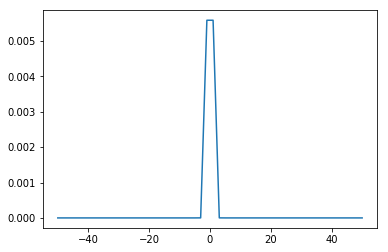

C:\Users\HP\Anaconda2\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


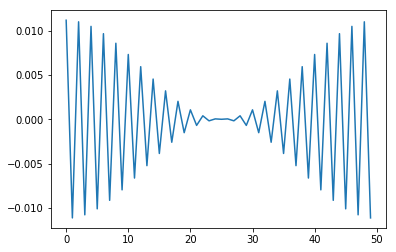

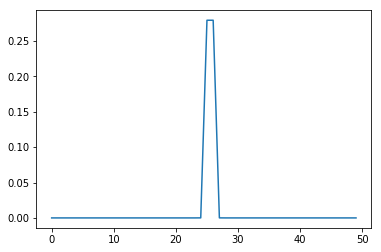

1 loop, best of 3: 386 ms per loop
10000 loops, best of 3: 223 µs per loop


In [1]:

import numpy as np
import matplotlib.pyplot as plt
from random import random
import scipy.fftpack
%matplotlib inline

mu, sigma = 0, 0.1 # mean and standard deviation

#distribucion aleatoria normal se uso para formar la gaussiana
x = np.random.normal(mu, sigma, 1000)
N=500
t = np.linspace(-50,50,50)
r = (np.exp(-t*t)/2)/(np.sqrt(2 * N))
plt.plot(t,r)
plt.show()

#Transformada
def DFT_slow(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N) 
    return np.dot(M, x)

#grafica transformada
F = DFT_slow(r)
plt.plot(F)
plt.show()

#Transformada inversa usando fft.
Y = np.fft.fft(F)
plt.plot(Y)
plt.show()

%timeit DFT_slow(x)
%timeit np.fft.fft(x)